<a href="https://colab.research.google.com/github/crosstar1228/Machine_Learning/blob/main/BackProp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 아래 사이트들을 참고하여 제작함
- [Forward Propagation](https://ml-cheatsheet.readthedocs.io/en/latest/forwardpropagation.html#code)
- [BackPropagation](https://ml-cheatsheet.readthedocs.io/en/latest/backpropagation.html#code-example)

## Forward Propagation
- Neural Network가 "어떻게" 에측을 하는지에 의의가 있다
- input 데이터가 forward propagated

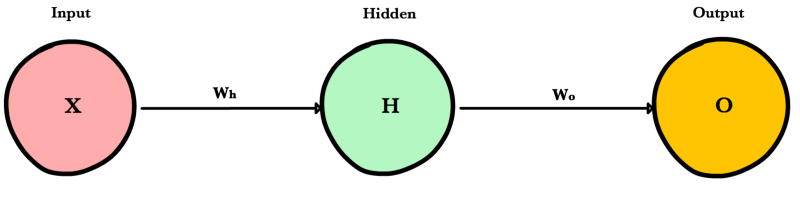

𝑃𝑟𝑒𝑑𝑖𝑐𝑡𝑖𝑜𝑛=𝐴(𝐴(𝑋𝑊ℎ)𝑊𝑜)


In [2]:
# 스칼라 input의 간단한 예시
def relu(z):
  return max(0,z)


def feed_forward(x, Wh, Wo):
  # Hidden Layer
  Zh = x * Wh
  H = relu(Zh)
  # Output Layer
  Zo = H * Wo
  output = relu(Zo)
  return output


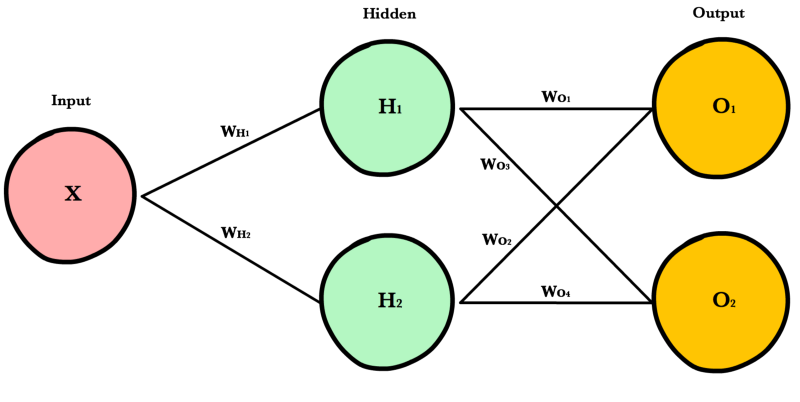

In [3]:
# parameter 미리 명시
INPUT_LAYER_SIZE = 1
HIDDEN_LAYER_SIZE = 2
OUTPUT_LAYER_SIZE =2

In [7]:
#Weight Initialization
import numpy as np

def init_weights():
    Wh = np.random.randn(INPUT_LAYER_SIZE, HIDDEN_LAYER_SIZE) * \
                np.sqrt(2.0/INPUT_LAYER_SIZE)
    Wo = np.random.randn(HIDDEN_LAYER_SIZE, OUTPUT_LAYER_SIZE) * \
                np.sqrt(2.0/HIDDEN_LAYER_SIZE)
    return Wh, Wo

In [8]:
def init_bias():
  Bh = np.full((1, HIDDEN_LAYER_SIZE), 0.1)
  Bo = np.full((1, OUTPUT_LAYER_SIZE), 0.1)

  return Bh, Bo

In [9]:
Bh, Bo = init_bias()

Wh, Wo = init_weights()

In [15]:
Bh

array([[0.1, 0.1]])

In [10]:
X = np.ones((3,1))
print(X)

[[1.]
 [1.]
 [1.]]


In [13]:
Zh = X @ Wh
Zh

array([[-0.78984166,  0.81897277],
       [-0.78984166,  0.81897277],
       [-0.78984166,  0.81897277]])

In [14]:
Zh + Bh

array([[-0.68984166,  0.91897277],
       [-0.68984166,  0.91897277],
       [-0.68984166,  0.91897277]])

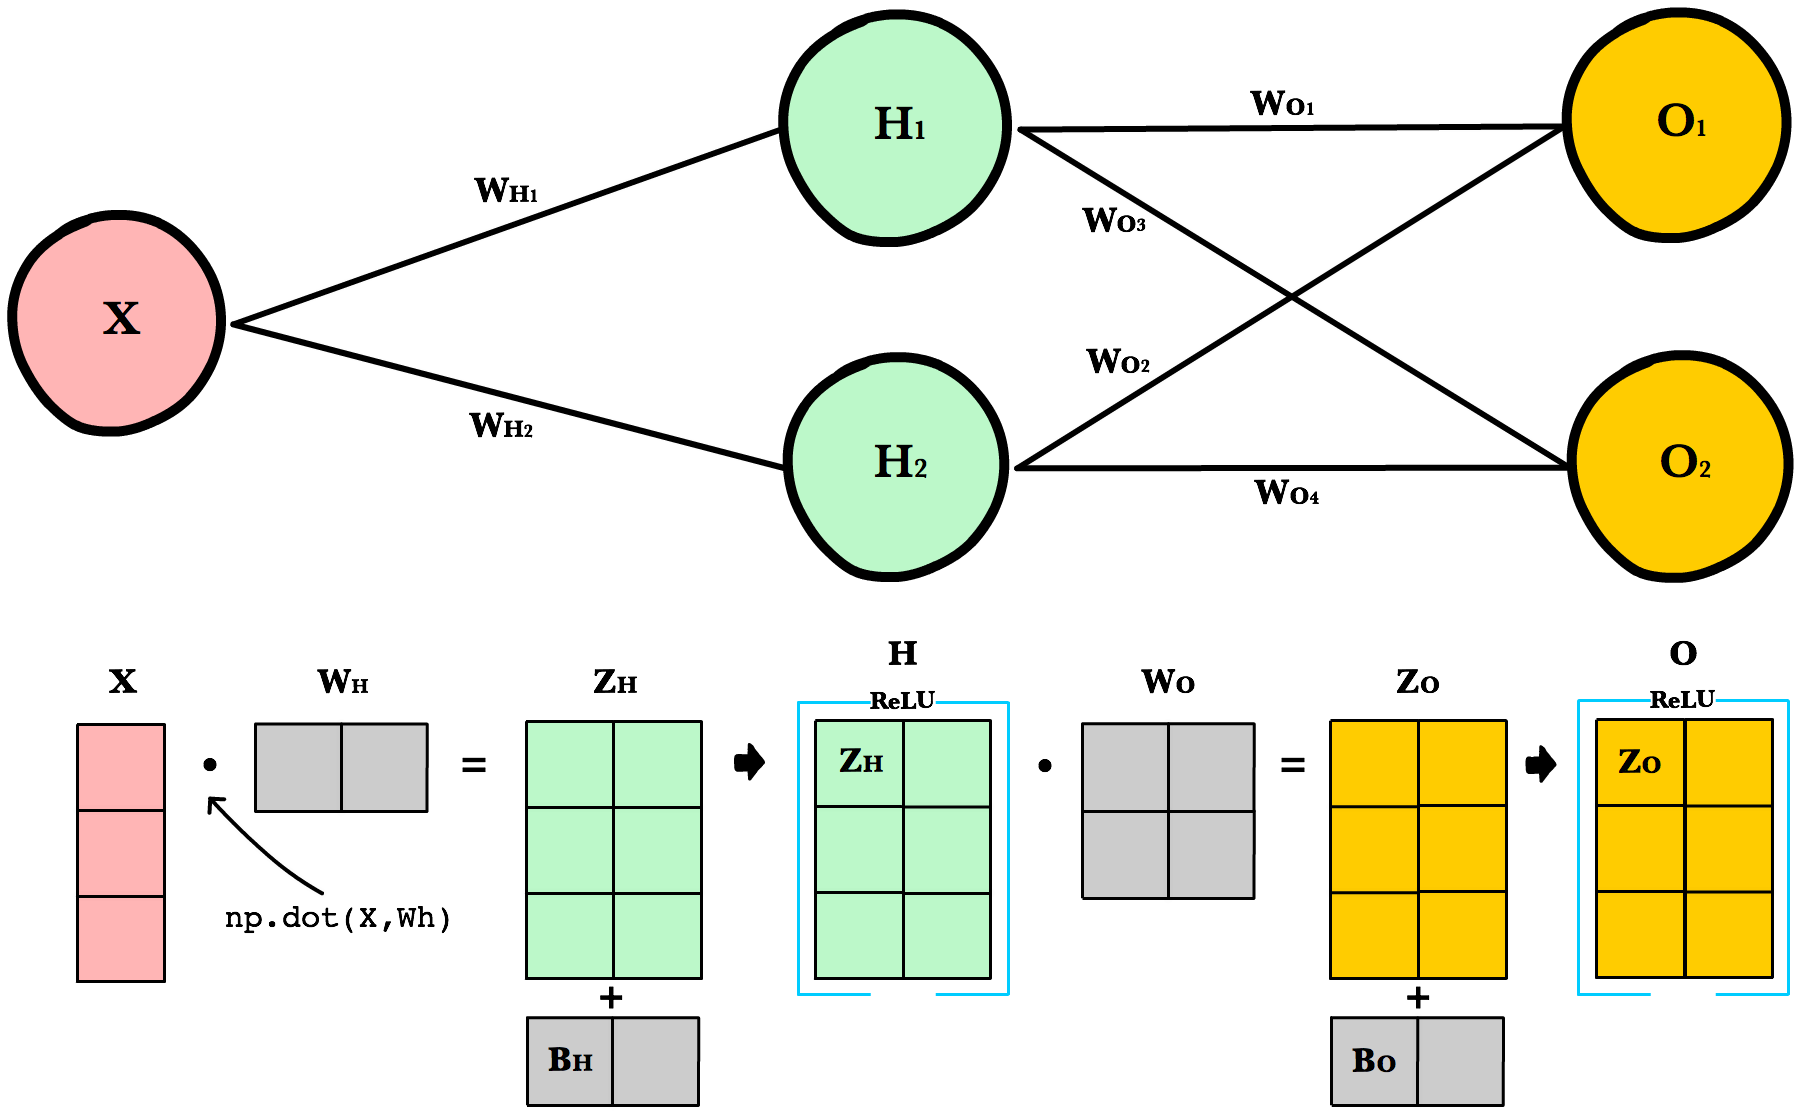

## 중요 point
n : 데이터 개수
d : 데이터 피쳐 수 (차원)
m : 뉴런 개수

- X : n * d
- W : d * m
- b : 1 * m
- Z : n * m

** W 와 b는 n 과 무관하다. -> 데이터 개수에 차원 영향을 받지 않는다.
아래 그림은 n=3일때와 n=1일때 비교
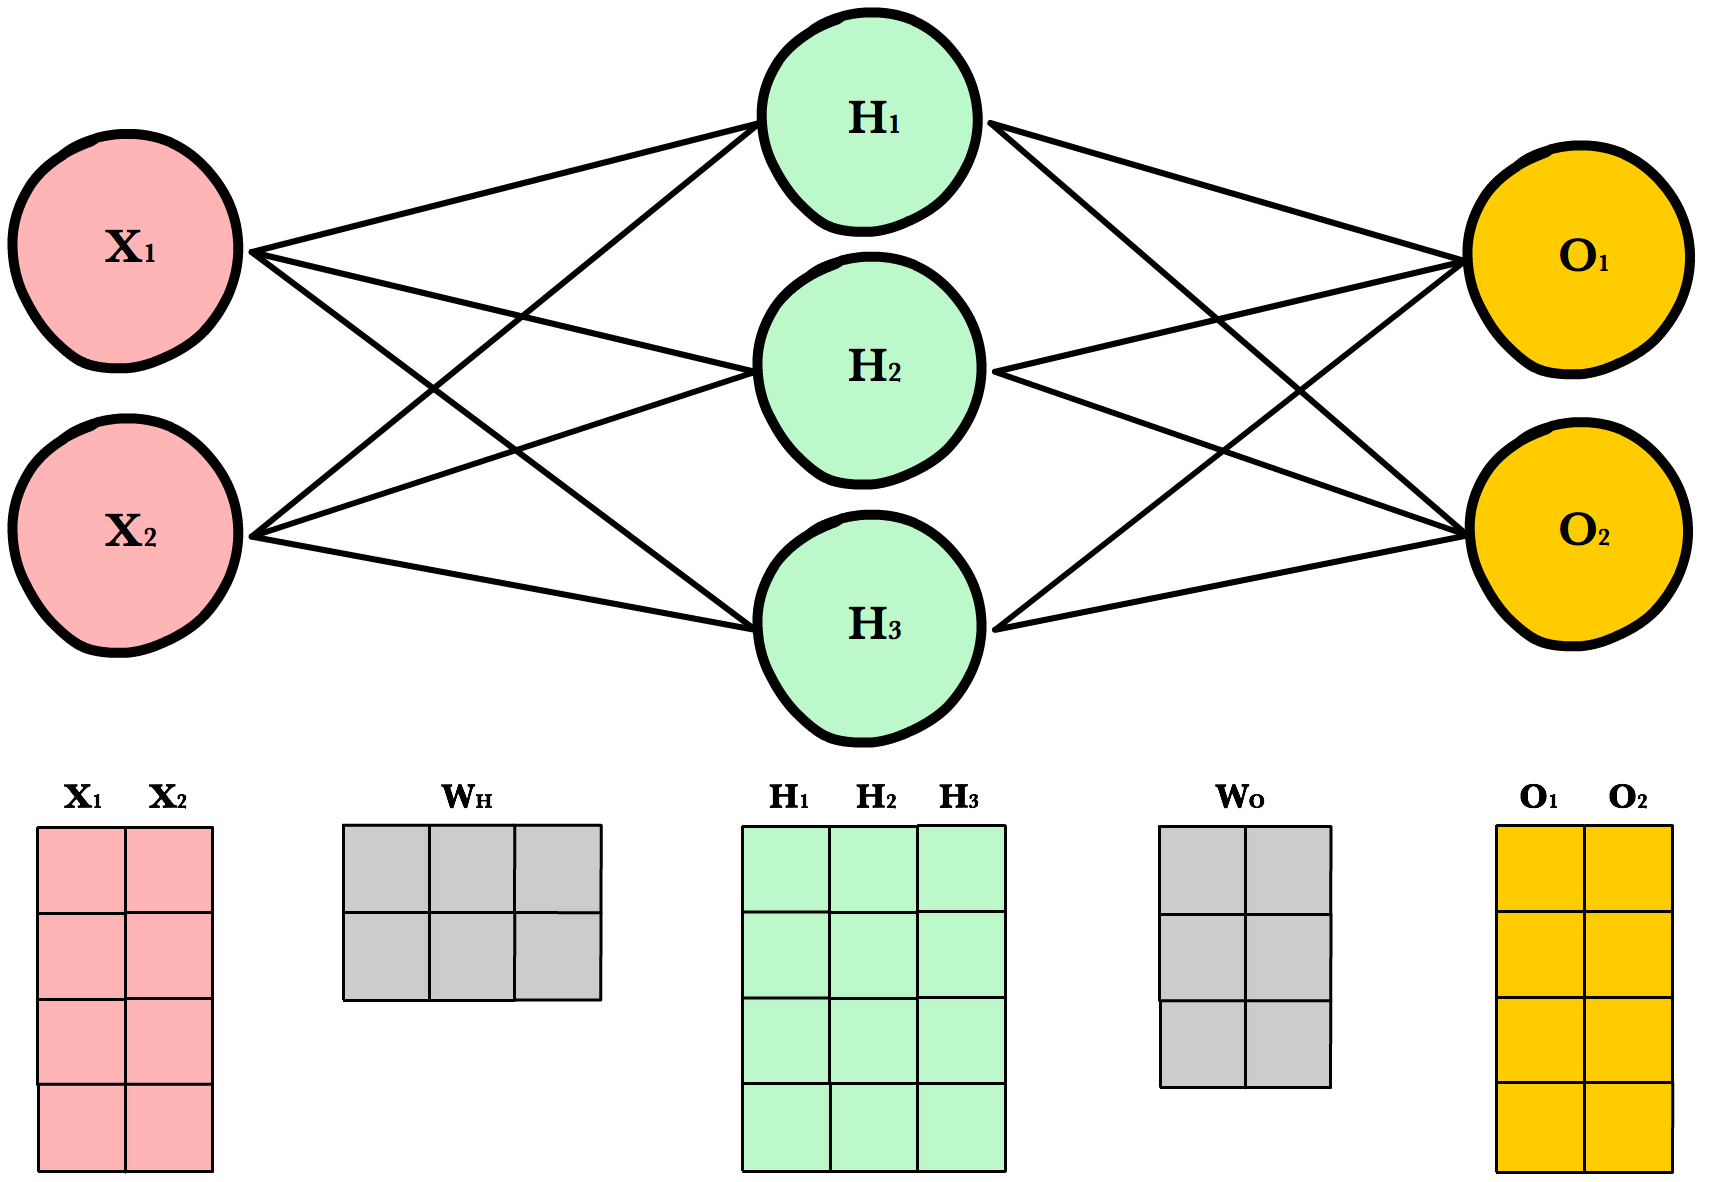

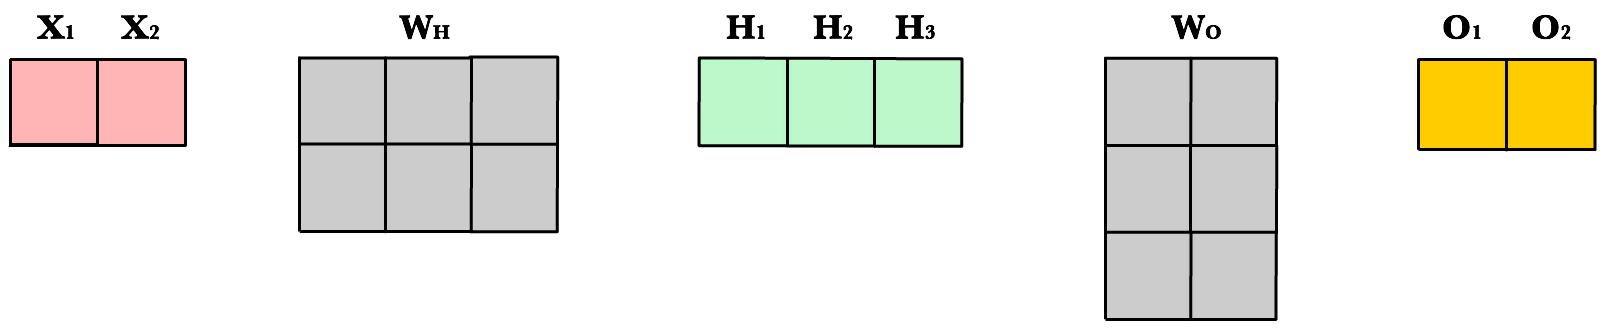



In [16]:
def relu(Z):
  return np.maximum(0, Z)

def feed_forward(X):
  """
  X - input matrix
  Zh - hidden layer weighted input
  Zo - output layer weighted input
  H - hidden layer activation
  y - output layer
  yHat - output layer predictions
  """

  # hidden layer
  Zh = (X @ Wh) + Bh
  H = relu(Zh)

  # Output layer
  Zo = (H @ Wo) + Bo
  yHat = relu(Zo)

  return yHat

In [25]:
love = np.array([1, 2, 3, 4, 5, 6])
# swap row and colum of love
love = love.reshape(3, 2)
love

array([[1, 2],
       [3, 4],
       [5, 6]])

## BackPorop

- 목적: 각각의 뉴런의 weight에서 총 Loss의 "기여도에 따라" 조절하는 것 + direction 예측
- iteratively 조정하다보면 좋은 예측을 할수있을것


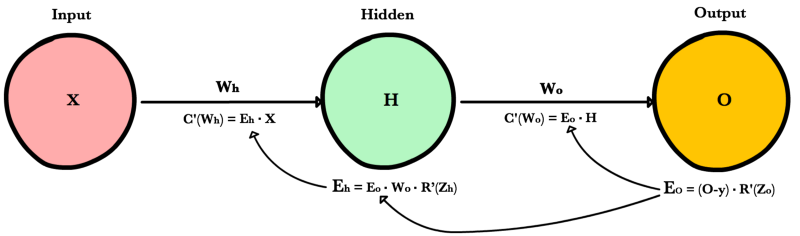


In [1]:
def relu_prime(z):
    if z > 0:
        return 1
    return 0

def cost(yHat, y):
    return 0.5 * (yHat - y)**2

def cost_prime(yHat, y):
    return yHat - y

def backprop(x, y, Wh, Wo, lr):
    yHat = feed_forward(x, Wh, Wo)

    # Layer Error
    Eo = (yHat - y) * relu_prime(Zo) # dL/dZo
    Eh = Eo * Wo * relu_prime(Zh) # dL/dZh

    # Cost derivative for weights
    dWo = Eo * H # dL/dWo
    dWh = Eh * x # dL/dWh

    # Update weights
    Wh -= lr * dWh
    Wo -= lr * dWo